# 토픽분석 (Latent Dirichlet Allocation)

### gensim 설치
 - !conda install -y gensim

## Topic model 
 - 텍스트의 주제(Topic)을 분석하기 위한 모형
 -  Latent Dirichlet Allocation 

In [1]:
from IPython.display import Image

### LDA 어렵게보기 

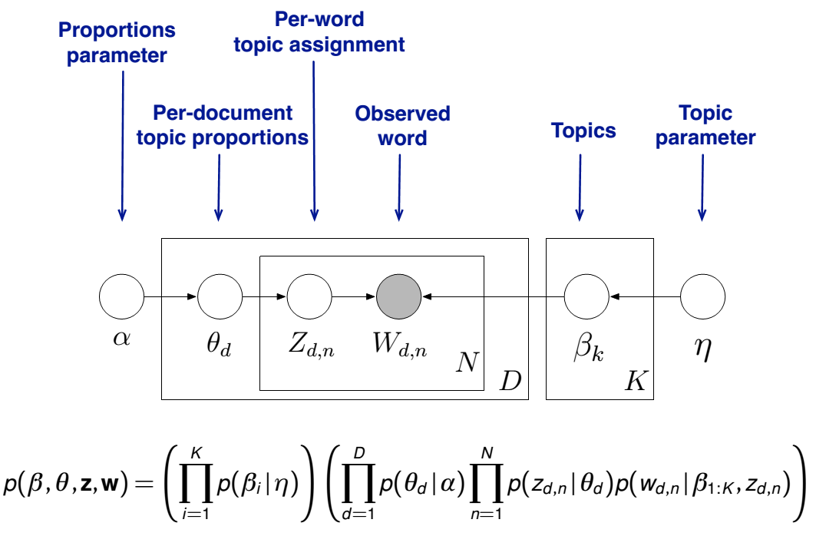

In [3]:
Image(filename="img/1.PNG",width=600)

### LDA 쉽게 보기 
 - Bag of Words

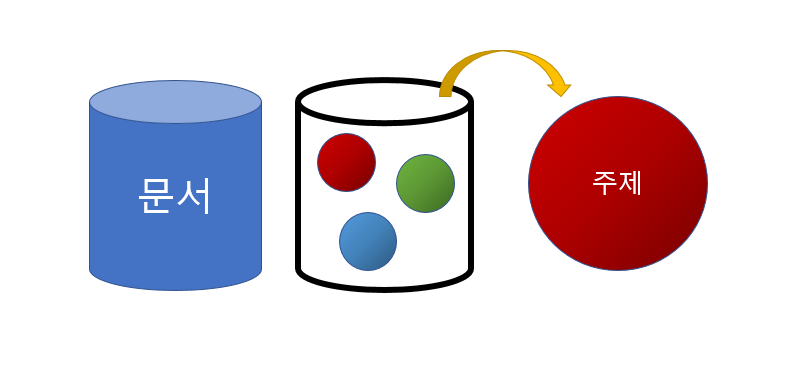

In [5]:
Image(filename="img/2.PNG",width=600)

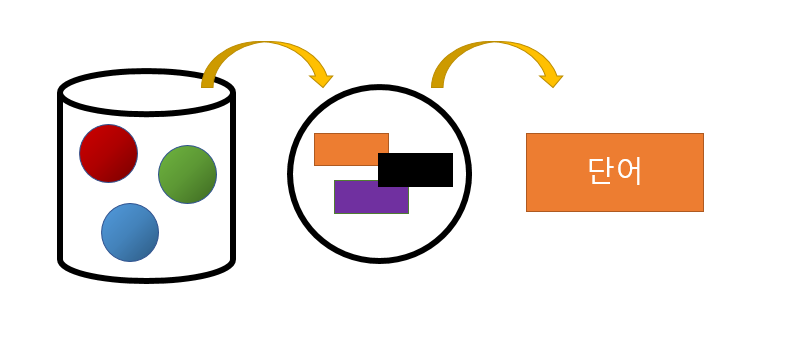

In [6]:
Image(filename="img/3.PNG",width=600)

 - Word Counts
  - 예) 은행 : 먹는 은행, 시중 은행 2개의 경우가 있다. 
  - Bag of words의 경우 은행을 파악할 수 없다.
  - But 주제 별로 보게 된다면 은행은 시중 은행이라는 것을 알 수 있다.

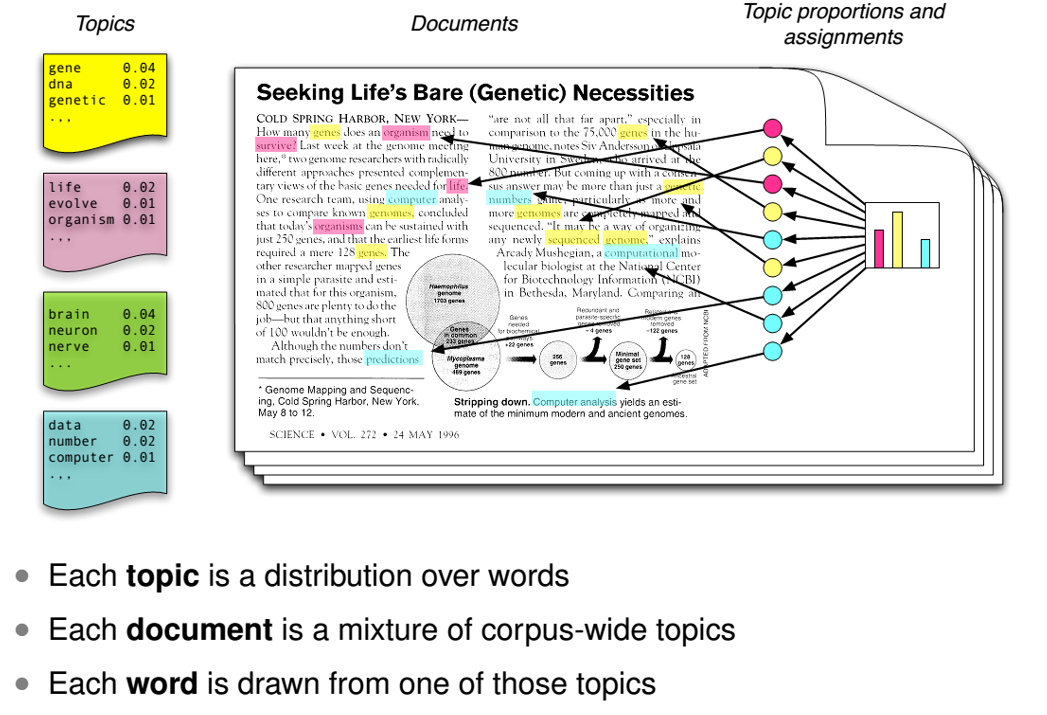

In [8]:
Image(filename="img/4.PNG",width=800)

## LDA 확장 
 - Correlated topic models
 - Dynamic topic models & measuring scholarly impact
 - Supervised topic models
 - Relational topic models
 - Ideal point topic models
 - Collaborative topic models

In [1]:
#!conda install -y gensim

## 데이터 불러오기 

In [9]:
import numpy as np 

In [10]:
tdm = np.load('data/tdm_small.npy')

In [11]:
tdm # 5347개의 기사 중에 1000개 단어를 뽑아서 TDM형태로 만들었다. 

array(<5347x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 652672 stored elements in Compressed Sparse Column format>, dtype=object)

In [12]:
tdm = tdm.tolist()

In [15]:
tdm

<5347x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 652672 stored elements in Compressed Sparse Column format>

In [13]:
with open('data/words_small.txt', encoding='utf8') as f:
    words = f.read().splitlines()

In [14]:
words[:10]

['출시', '제품', '제공', '시장', '사용', '서비스', '게임', '기능', '판매', '국내']

### gensim 포맷으로 바꾸기

In [17]:
from gensim.matutils import Sparse2Corpus

In [18]:
corpus = Sparse2Corpus(tdm.T) # dtm형태로 변환.

In [19]:
corpus

## Latent Dirichelt Allocation 
<a href="https://radimrehurek.com/gensim/models/ldamodel.html"> LdaModel 문서 </a>

In [20]:
from gensim.models.ldamodel import LdaModel

 - enumerate : 리스트를 넣어주게 되면 앞에 숫자를 붙여준다.

In [21]:
dict(enumerate(['a','b','c']))

{0: 'a', 1: 'b', 2: 'c'}

In [23]:
dict(enumerate(words))

{0: '출시',
 1: '제품',
 2: '제공',
 3: '시장',
 4: '사용',
 5: '서비스',
 6: '게임',
 7: '기능',
 8: '판매',
 9: '국내',
 10: '고객',
 11: '모델',
 12: '상품',
 13: '가격',
 14: '기자',
 15: '이번',
 16: '적용',
 17: '브랜드',
 18: '기존',
 19: '디자인',
 20: '개발',
 21: '진행',
 22: '스마트폰',
 23: '모바일',
 24: '소비자',
 25: '이상',
 26: '기술',
 27: '피부',
 28: '지원',
 29: '이용',
 30: '예정',
 31: '최대',
 32: '이벤트',
 33: '인기',
 34: '시스템',
 35: '관계자',
 36: '가지',
 37: '구성',
 38: '경우',
 39: '올해',
 40: '대표',
 41: '최근',
 42: '중국',
 43: '한국',
 44: '추가',
 45: '특징',
 46: '기업',
 47: '지난해',
 48: '성능',
 49: '신제품',
 50: '삼성전자',
 51: '때문',
 52: '업계',
 53: '활용',
 54: '시리즈',
 55: '구매',
 56: '효과',
 57: '탑재',
 58: '업체',
 59: '한편',
 60: '계획',
 61: '공개',
 62: '세계',
 63: '프리미엄',
 64: '시작',
 65: '시간',
 66: '강화',
 67: '애플',
 68: '카드',
 69: '최고',
 70: '미국',
 71: '글로벌',
 72: '관련',
 73: '사진',
 74: '최초',
 75: '할인',
 76: '아이폰',
 77: '확인',
 78: '선택',
 79: '사업',
 80: '컬러',
 81: '확대',
 82: '가입',
 83: '투자',
 84: '아이',
 85: '기사',
 86: '사용자',
 87: '라인',
 88: '대비',
 89: '기대',


 - 주제 지정 : num_topics  100~200
 - 주제를 많게 하면 크기가 작아지고 
 - 주제를 적게 하면 크기가 커져버린다. 
  - 문서가 10개밖에 없는데 주제가 1000개면 안되니깐. 
 - id2word : tdm에 실제론 단어가 없다. 단어목록이 필요하다. 그걸 매칭 시켜서 넣어주는 역할을 하는 것. 

In [24]:
lda = LdaModel(corpus=corpus, num_topics=100,
               id2word=dict(enumerate(words)), random_state=1234)

### Topic 보기 

In [26]:
lda.show_topic(0) # 0번째 토픽의 내용. 많이 쓰이는 단어들.

[('엔진', 0.03559830066839538),
 ('모델', 0.022061465894983787),
 ('터보', 0.021861394456765229),
 ('쏘나타', 0.019960680725564787),
 ('출시', 0.01886410892934174),
 ('주행', 0.017581164097096855),
 ('성능', 0.015605642117549542),
 ('시장', 0.015313583378759772),
 ('현대차', 0.015135502378449798),
 ('연비', 0.013742791878268448)]

In [27]:
lda.show_topic(1) # 1번째 토픽의 내용. 

[('기술', 0.01413361453434535),
 ('제공', 0.012383979812783793),
 ('지원', 0.011869751556929677),
 ('제품', 0.011281012955116763),
 ('상품', 0.011035554493394006),
 ('확대', 0.010133016933681523),
 ('키보드', 0.0099974017176334626),
 ('인증', 0.0084583665725530364),
 ('출시', 0.0083868389641043491),
 ('개발', 0.0083003654066913565)]

In [28]:
result_sum = 0
for topic in lda.show_topic(1):
    result_sum += topic[1]

result_sum

0.10597990294723331

### 문서의 topic 확인
#### 문서 변환 

In [30]:
doc = [(i, tdm[0,i]) for i in range(1000)]

In [32]:
doc[:10] # 1000개의 단어가 첫번째 문서에서 몇개 씩 나왔는지.

[(0, 6),
 (1, 0),
 (2, 13),
 (3, 0),
 (4, 2),
 (5, 1),
 (6, 37),
 (7, 1),
 (8, 2),
 (9, 0)]

### 문서에서 가장 많이 쓰인 단어들 보기

In [33]:
doc_words = [(words[i], n) for i,n in doc]

In [34]:
doc_words[:10]

[('출시', 6),
 ('제품', 0),
 ('제공', 13),
 ('시장', 0),
 ('사용', 2),
 ('서비스', 1),
 ('게임', 37),
 ('기능', 1),
 ('판매', 2),
 ('국내', 0)]

In [35]:
sorted(doc_words, key=lambda x:x[1], reverse=True)[:10]

[('게임', 37),
 ('이벤트', 31),
 ('아이템', 26),
 ('진행', 16),
 ('제공', 13),
 ('접속', 9),
 ('최대', 8),
 ('동안', 8),
 ('지급', 8),
 ('이상', 7)]

### 문서의 TOPIC

In [36]:
lda.get_document_topics(doc) # 0번의 뉴스기사는 7번 토픽이 50프로 40버닝 45프로 

[(7, 0.50037888840330735),
 (40, 0.45461820734352304),
 (47, 0.023145983481028424),
 (84, 0.020021356718605273)]

In [37]:
lda.show_topic(7)

[('게임', 0.079781346868075781),
 ('출시', 0.019118233242111399),
 ('캐릭터', 0.01753932935494373),
 ('모바일', 0.016401619836328749),
 ('콘텐츠', 0.01567969429399969),
 ('유저', 0.014825264635199746),
 ('진행', 0.014671920870461565),
 ('개발', 0.014088483608665341),
 ('플레이', 0.012352623748539125),
 ('공개', 0.011440371837632909)]

In [38]:
lda.show_topic(40)

[('이벤트', 0.044510703076266547),
 ('진행', 0.03663609600298795),
 ('행사', 0.030709145787182889),
 ('할인', 0.030225272833630745),
 ('구매', 0.019143617972029073),
 ('제공', 0.015832552597364387),
 ('출시', 0.014558022680202766),
 ('이번', 0.013844299670335306),
 ('증정', 0.013542478560328584),
 ('고객', 0.012398309133169812)]

### 1번 문서 확인 

In [39]:
doc2 = [(i, tdm[1,i]) for i in range(1000)]

In [40]:
doc_words2 = [(words[i], n) for i,n in doc2]

In [41]:
doc_words2[:10]

[('출시', 2),
 ('제품', 0),
 ('제공', 3),
 ('시장', 6),
 ('사용', 7),
 ('서비스', 0),
 ('게임', 0),
 ('기능', 0),
 ('판매', 3),
 ('국내', 16)]

In [42]:
sorted(doc_words2, key=lambda x:x[1], reverse=True)[:10]

[('국내', 16),
 ('사용', 7),
 ('삼성전자', 7),
 ('시장', 6),
 ('구매', 6),
 ('조사', 6),
 ('구글', 6),
 ('때문', 5),
 ('해외', 5),
 ('노트북', 5)]

In [43]:
lda.get_document_topics(doc2)

[(2, 0.073015649341466815),
 (6, 0.21647387917760397),
 (9, 0.13948775326892332),
 (10, 0.075272218416023204),
 (62, 0.074565573474988572),
 (73, 0.033603901246646153),
 (91, 0.13477736710417448),
 (92, 0.0628860249926462),
 (93, 0.087325398204761873),
 (95, 0.086876725155613316)]

In [44]:
lda.show_topic(6)

[('라면', 0.036101703364220743),
 ('제품', 0.03096448295567562),
 ('출시', 0.022574154175568444),
 ('시장', 0.020560352254626543),
 ('사용', 0.01383393105152742),
 ('프로그램', 0.01346808838313405),
 ('스마트폰', 0.0085064125544441621),
 ('소비자', 0.0084995035738468505),
 ('클라우드', 0.0075079381027733528),
 ('개발', 0.0074793654848846879)]

In [45]:
lda.show_topic(9)

[('사업', 0.022719728121037758),
 ('서비스', 0.021818036470740924),
 ('기업', 0.016281058526879954),
 ('시장', 0.01529662443761101),
 ('산업', 0.011993140693420001),
 ('지원', 0.0098383042622658835),
 ('올해', 0.0095429328723263505),
 ('대표', 0.0095350262619155416),
 ('국내', 0.0089783325940690634),
 ('중국', 0.0088921796739221074)]

- 활용 방법
 - 우리가 알고 싶어하는 토픽을 지정해서 글전체를 크롤링해서 전체를 LDA하고 해당 토픽의 비율을 본다. 

### LDA 모델 저장하기

In [46]:
lda.save("data/20170429.lda")

### LDA 모델 불러오기 

In [49]:
lda = LdaModel.load('data/20170429.lda')

In [50]:
lda.show_topic(0)

[('엔진', 0.03559830066839538),
 ('모델', 0.022061465894983787),
 ('터보', 0.021861394456765229),
 ('쏘나타', 0.019960680725564787),
 ('출시', 0.01886410892934174),
 ('주행', 0.017581164097096855),
 ('성능', 0.015605642117549542),
 ('시장', 0.015313583378759772),
 ('현대차', 0.015135502378449798),
 ('연비', 0.013742791878268448)]

# 활용 

In [51]:
from collections import Counter

In [52]:
total = Counter()

In [55]:
num = tdm.shape[0]
for n in range(num):
    doc = [(i, tdm[n,i]) for i in range(1000)]
    topics = lda.get_document_topics(doc)
    for topic,ratio in topics:
        total[topic] += ratio

In [56]:
sorted(total.items(), key=lambda x:x[1], reverse=True)

[(32, 202.63649209745753),
 (79, 167.7872154999379),
 (7, 166.79167473450039),
 (11, 160.19570456428849),
 (93, 152.66723216981529),
 (31, 142.82526695955062),
 (2, 140.08731903289171),
 (13, 133.82202625532355),
 (86, 130.56511750388458),
 (70, 122.6623061623321),
 (96, 115.53500213806443),
 (99, 113.48466592072714),
 (9, 111.85187477614073),
 (65, 107.61896245030253),
 (94, 103.9916333630306),
 (90, 96.908606196451615),
 (39, 95.89596454732343),
 (4, 81.208361330092373),
 (0, 79.928543177606429),
 (27, 79.308512019751404),
 (40, 78.614405143577216),
 (84, 75.524820903124308),
 (24, 73.99996756497859),
 (92, 72.939009748096424),
 (95, 72.671422889048529),
 (49, 71.897031726787176),
 (89, 71.756848638356047),
 (44, 69.849593065495213),
 (29, 69.009483608996916),
 (72, 65.790626764986456),
 (20, 65.301777990197834),
 (15, 63.898613401902097),
 (67, 62.593459330887818),
 (10, 61.744386942926944),
 (73, 60.643640035986849),
 (30, 59.812071039541259),
 (36, 59.14078209954814),
 (66, 58.852

In [59]:
lda.show_topic(32)

[('상품', 0.039365202104657375),
 ('금융', 0.034608988327784078),
 ('고객', 0.026587372964526464),
 ('가입', 0.024567468069202045),
 ('계좌', 0.019564046102156431),
 ('보험', 0.018872026170587329),
 ('은행', 0.018649599905942192),
 ('연금', 0.014788980364521073),
 ('출시', 0.014184595131843003),
 ('서비스', 0.013778103148236871)]

In [60]:
lda.show_topic(79)

[('적용', 0.035615205970862686),
 ('시스템', 0.0278502756901765),
 ('디자인', 0.022165810300190953),
 ('모델', 0.022102134774972568),
 ('주행', 0.019219508630231384),
 ('최고', 0.014828876969073873),
 ('엔진', 0.014337227426088152),
 ('안전', 0.014026648837611892),
 ('기능', 0.013393785366017456),
 ('출시', 0.013215409451121939)]